In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

# Load BASELINE datasets
df_baseline_iowait = pd.read_csv("baseline/cpu_iowait.csv")
df_baseline_irq = pd.read_csv("baseline/cpu_irq.csv")
df_baseline_system_msec = pd.read_csv("baseline/cpu_system_msec.csv")
df_baseline_user_msec = pd.read_csv("baseline/cpu_user_msec.csv")
df_baseline_util_per = pd.read_csv("baseline/cpu_util_per.csv")

# Load CPU STRESS datasets
df_cpustress_iowait = pd.read_csv("cpu stress/cpu_iowait.csv")
df_cpustress_irq = pd.read_csv("cpu stress/cpu_irq.csv")
df_cpustress_system_msec = pd.read_csv("cpu stress/cpu_system_msec.csv")
df_cpustress_user_msec = pd.read_csv("cpu stress/cpu_user_msec.csv")
df_cpustress_util_per = pd.read_csv("cpu stress/cpu_util_per.csv")

# Load IO pressure datasets
df_IO_iowait = pd.read_csv("IO pressure/cpu_iowait.csv")
df_IO_irq = pd.read_csv("IO pressure/cpu_irq.csv")
df_IO_system_msec = pd.read_csv("IO pressure/cpu_system_msec.csv")
df_IO_user_msec = pd.read_csv("IO pressure/cpu_user_msec.csv")
df_IO_util_per = pd.read_csv("IO pressure/cpu_util_per.csv")

# Load MEM STRESS datasets
df_memstress_iowait = pd.read_csv("mem stress/cpu_iowait.csv")
df_memstress_irq = pd.read_csv("mem stress/cpu_irq.csv")
df_memstress_system_msec = pd.read_csv("mem stress/cpu_system_msec.csv")
df_memstress_user_msec = pd.read_csv("mem stress/cpu_user_msec.csv")
df_memstress_util_per = pd.read_csv("mem stress/cpu_util_per.csv")

# Load NET LOSS datasets
df_netloss_iowait = pd.read_csv("netloss/cpu_iowait.csv")
df_netloss_irq = pd.read_csv("netloss/cpu_irq.csv")
df_netloss_system_msec = pd.read_csv("netloss/cpu_system_msec.csv")
df_netloss_user_msec = pd.read_csv("netloss/cpu_user_msec.csv")
df_netloss_util_per = pd.read_csv("netloss/cpu_util_per.csv")


# Add source labels - BASELINE
df_baseline_iowait["source"] = "BASELINE"
df_baseline_irq["source"] = "BASELINE"
df_baseline_system_msec["source"] = "BASELINE"
df_baseline_user_msec["source"] = "BASELINE"
df_baseline_util_per["source"] = "BASELINE"

# Add source labels - CPU STRESS
df_cpustress_iowait["source"] = "CPU_STRESS"
df_cpustress_irq["source"] = "CPU_STRESS"
df_cpustress_system_msec["source"] = "CPU_STRESS"
df_cpustress_user_msec["source"] = "CPU_STRESS"
df_cpustress_util_per["source"] = "CPU_STRESS"

# Add source labels - DELAY
df_IO_iowait["source"] = "IO"
df_IO_irq["source"] = "IO"
df_IO_system_msec["source"] = "IO"
df_IO_user_msec["source"] = "IO"
df_IO_util_per["source"] = "IO"

# Add source labels - MEM STRESS
df_memstress_iowait["source"] = "MEM_STRESS"
df_memstress_irq["source"] = "MEM_STRESS"
df_memstress_system_msec["source"] = "MEM_STRESS"
df_memstress_user_msec["source"] = "MEM_STRESS"
df_memstress_util_per["source"] = "MEM_STRESS"

# Add source labels - NET LOSS
df_netloss_iowait["source"] = "NET_LOSS"
df_netloss_irq["source"] = "NET_LOSS"
df_netloss_system_msec["source"] = "NET_LOSS"
df_netloss_user_msec["source"] = "NET_LOSS"
df_netloss_util_per["source"] = "NET_LOSS"


# Convert to datetime - BASELINE
df_baseline_iowait["Time"] = pd.to_datetime(df_baseline_iowait["Time"])
df_baseline_irq["Time"] = pd.to_datetime(df_baseline_irq["Time"])
df_baseline_system_msec["Time"] = pd.to_datetime(df_baseline_system_msec["Time"])
df_baseline_user_msec["Time"] = pd.to_datetime(df_baseline_user_msec["Time"])
df_baseline_util_per["Time"] = pd.to_datetime(df_baseline_util_per["Time"])

# Convert to datetime - CPU STRESS
df_cpustress_iowait["Time"] = pd.to_datetime(df_cpustress_iowait["Time"])
df_cpustress_irq["Time"] = pd.to_datetime(df_cpustress_irq["Time"])
df_cpustress_system_msec["Time"] = pd.to_datetime(df_cpustress_system_msec["Time"])
df_cpustress_user_msec["Time"] = pd.to_datetime(df_cpustress_user_msec["Time"])
df_cpustress_util_per["Time"] = pd.to_datetime(df_cpustress_util_per["Time"])

# Convert to datetime - DELAY
df_IO_iowait["Time"] = pd.to_datetime(df_IO_iowait["Time"])
df_IO_irq["Time"] = pd.to_datetime(df_IO_irq["Time"])
df_IO_system_msec["Time"] = pd.to_datetime(df_IO_system_msec["Time"])
df_IO_user_msec["Time"] = pd.to_datetime(df_IO_user_msec["Time"])
df_IO_util_per["Time"] = pd.to_datetime(df_IO_util_per["Time"])

# Convert to datetime - MEM STRESS
df_memstress_iowait["Time"] = pd.to_datetime(df_memstress_iowait["Time"])
df_memstress_irq["Time"] = pd.to_datetime(df_memstress_irq["Time"])
df_memstress_system_msec["Time"] = pd.to_datetime(df_memstress_system_msec["Time"])
df_memstress_user_msec["Time"] = pd.to_datetime(df_memstress_user_msec["Time"])
df_memstress_util_per["Time"] = pd.to_datetime(df_memstress_util_per["Time"])

# Convert to datetime - NET LOSS
df_netloss_iowait["Time"] = pd.to_datetime(df_netloss_iowait["Time"])
df_netloss_irq["Time"] = pd.to_datetime(df_netloss_irq["Time"])
df_netloss_system_msec["Time"] = pd.to_datetime(df_netloss_system_msec["Time"])
df_netloss_user_msec["Time"] = pd.to_datetime(df_netloss_user_msec["Time"])
df_netloss_util_per["Time"] = pd.to_datetime(df_netloss_util_per["Time"])


delay = 30
duration = 50

# Synchronize all datasets with baseline timeline
time_offset = df_baseline_iowait["Time"].min()

# Synchronize CPU STRESS datasets
cpustress_offset = time_offset - df_cpustress_iowait["Time"].min()
df_cpustress_iowait["Time"] += cpustress_offset
df_cpustress_irq["Time"] += cpustress_offset
df_cpustress_system_msec["Time"] += cpustress_offset
df_cpustress_user_msec["Time"] += cpustress_offset
df_cpustress_util_per["Time"] += cpustress_offset

# Synchronize IO datasets
delay_offset = time_offset - df_IO_iowait["Time"].min()
df_IO_iowait["Time"] += delay_offset
df_IO_irq["Time"] += delay_offset
df_IO_system_msec["Time"] += delay_offset
df_IO_user_msec["Time"] += delay_offset
df_IO_util_per["Time"] += delay_offset

# Synchronize MEM STRESS datasets
memstress_offset = time_offset - df_memstress_iowait["Time"].min()
df_memstress_iowait["Time"] += memstress_offset
df_memstress_irq["Time"] += memstress_offset
df_memstress_system_msec["Time"] += memstress_offset
df_memstress_user_msec["Time"] += memstress_offset
df_memstress_util_per["Time"] += memstress_offset

# Synchronize NET LOSS datasets
netloss_offset = time_offset - df_netloss_iowait["Time"].min()
df_netloss_iowait["Time"] += netloss_offset
df_netloss_irq["Time"] += netloss_offset
df_netloss_system_msec["Time"] += netloss_offset
df_netloss_user_msec["Time"] += netloss_offset
df_netloss_util_per["Time"] += netloss_offset


# Convert timeline to minutes for ALL datasets
all_dfs = [
    # Baseline
    df_baseline_iowait, df_baseline_irq, df_baseline_system_msec, df_baseline_user_msec, df_baseline_util_per,
    # CPU Stress
    df_cpustress_iowait, df_cpustress_irq, df_cpustress_system_msec, df_cpustress_user_msec, df_cpustress_util_per,
    # IO
    df_IO_iowait, df_IO_irq, df_IO_system_msec, df_IO_user_msec, df_IO_util_per,
    # Memory Stress
    df_memstress_iowait, df_memstress_irq, df_memstress_system_msec, df_memstress_user_msec, df_memstress_util_per,
    # Network Loss
    df_netloss_iowait, df_netloss_irq, df_netloss_system_msec, df_netloss_user_msec, df_netloss_util_per
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# COMPLETE DATASETS DICTIONARY 
all_datasets = {
    'IOWait': {
        'baseline': df_baseline_iowait,
        'cpu_stress': df_cpustress_iowait,
        'delay': df_IO_iowait,
        'mem_stress': df_memstress_iowait,
        'net_loss': df_netloss_iowait,
    },
    'IRQ': {
        'baseline': df_baseline_irq,
        'cpu_stress': df_cpustress_irq,
        'delay': df_IO_irq,
        'mem_stress': df_memstress_irq,
        'net_loss': df_netloss_irq,
    },
    'System': {
        'baseline': df_baseline_system_msec,
        'cpu_stress': df_cpustress_system_msec,
        'delay': df_IO_system_msec,
        'mem_stress': df_memstress_system_msec,
        'net_loss': df_netloss_system_msec,
    },
    'User': {
        'baseline': df_baseline_user_msec,
        'cpu_stress': df_cpustress_user_msec,
        'delay': df_IO_user_msec,
        'mem_stress': df_memstress_user_msec,
        'net_loss': df_netloss_user_msec,
    },
    'Utilization': {
        'baseline': df_baseline_util_per,
        'cpu_stress': df_cpustress_util_per,
        'delay': df_IO_util_per,
        'mem_stress': df_memstress_util_per,
        'net_loss': df_netloss_util_per,
    }
}

print("✅ All datasets loaded successfully!")
print(f"📊 Loaded {len(all_datasets)} metrics across {len(all_datasets['IOWait'])} experiment types")
print("\nDataset structure:")
for metric, experiments in all_datasets.items():
    print(f"  {metric}: {list(experiments.keys())}")

✅ All datasets loaded successfully!
📊 Loaded 5 metrics across 5 experiment types

Dataset structure:
  IOWait: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  IRQ: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  System: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  User: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  Utilization: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']


Running TUNA analysis...
Processing IOWait
Training IOWait...
Processing IRQ
Training IRQ...
Processing System
Training System...
Processing User
Training User...
Processing Utilization
Training Utilization...


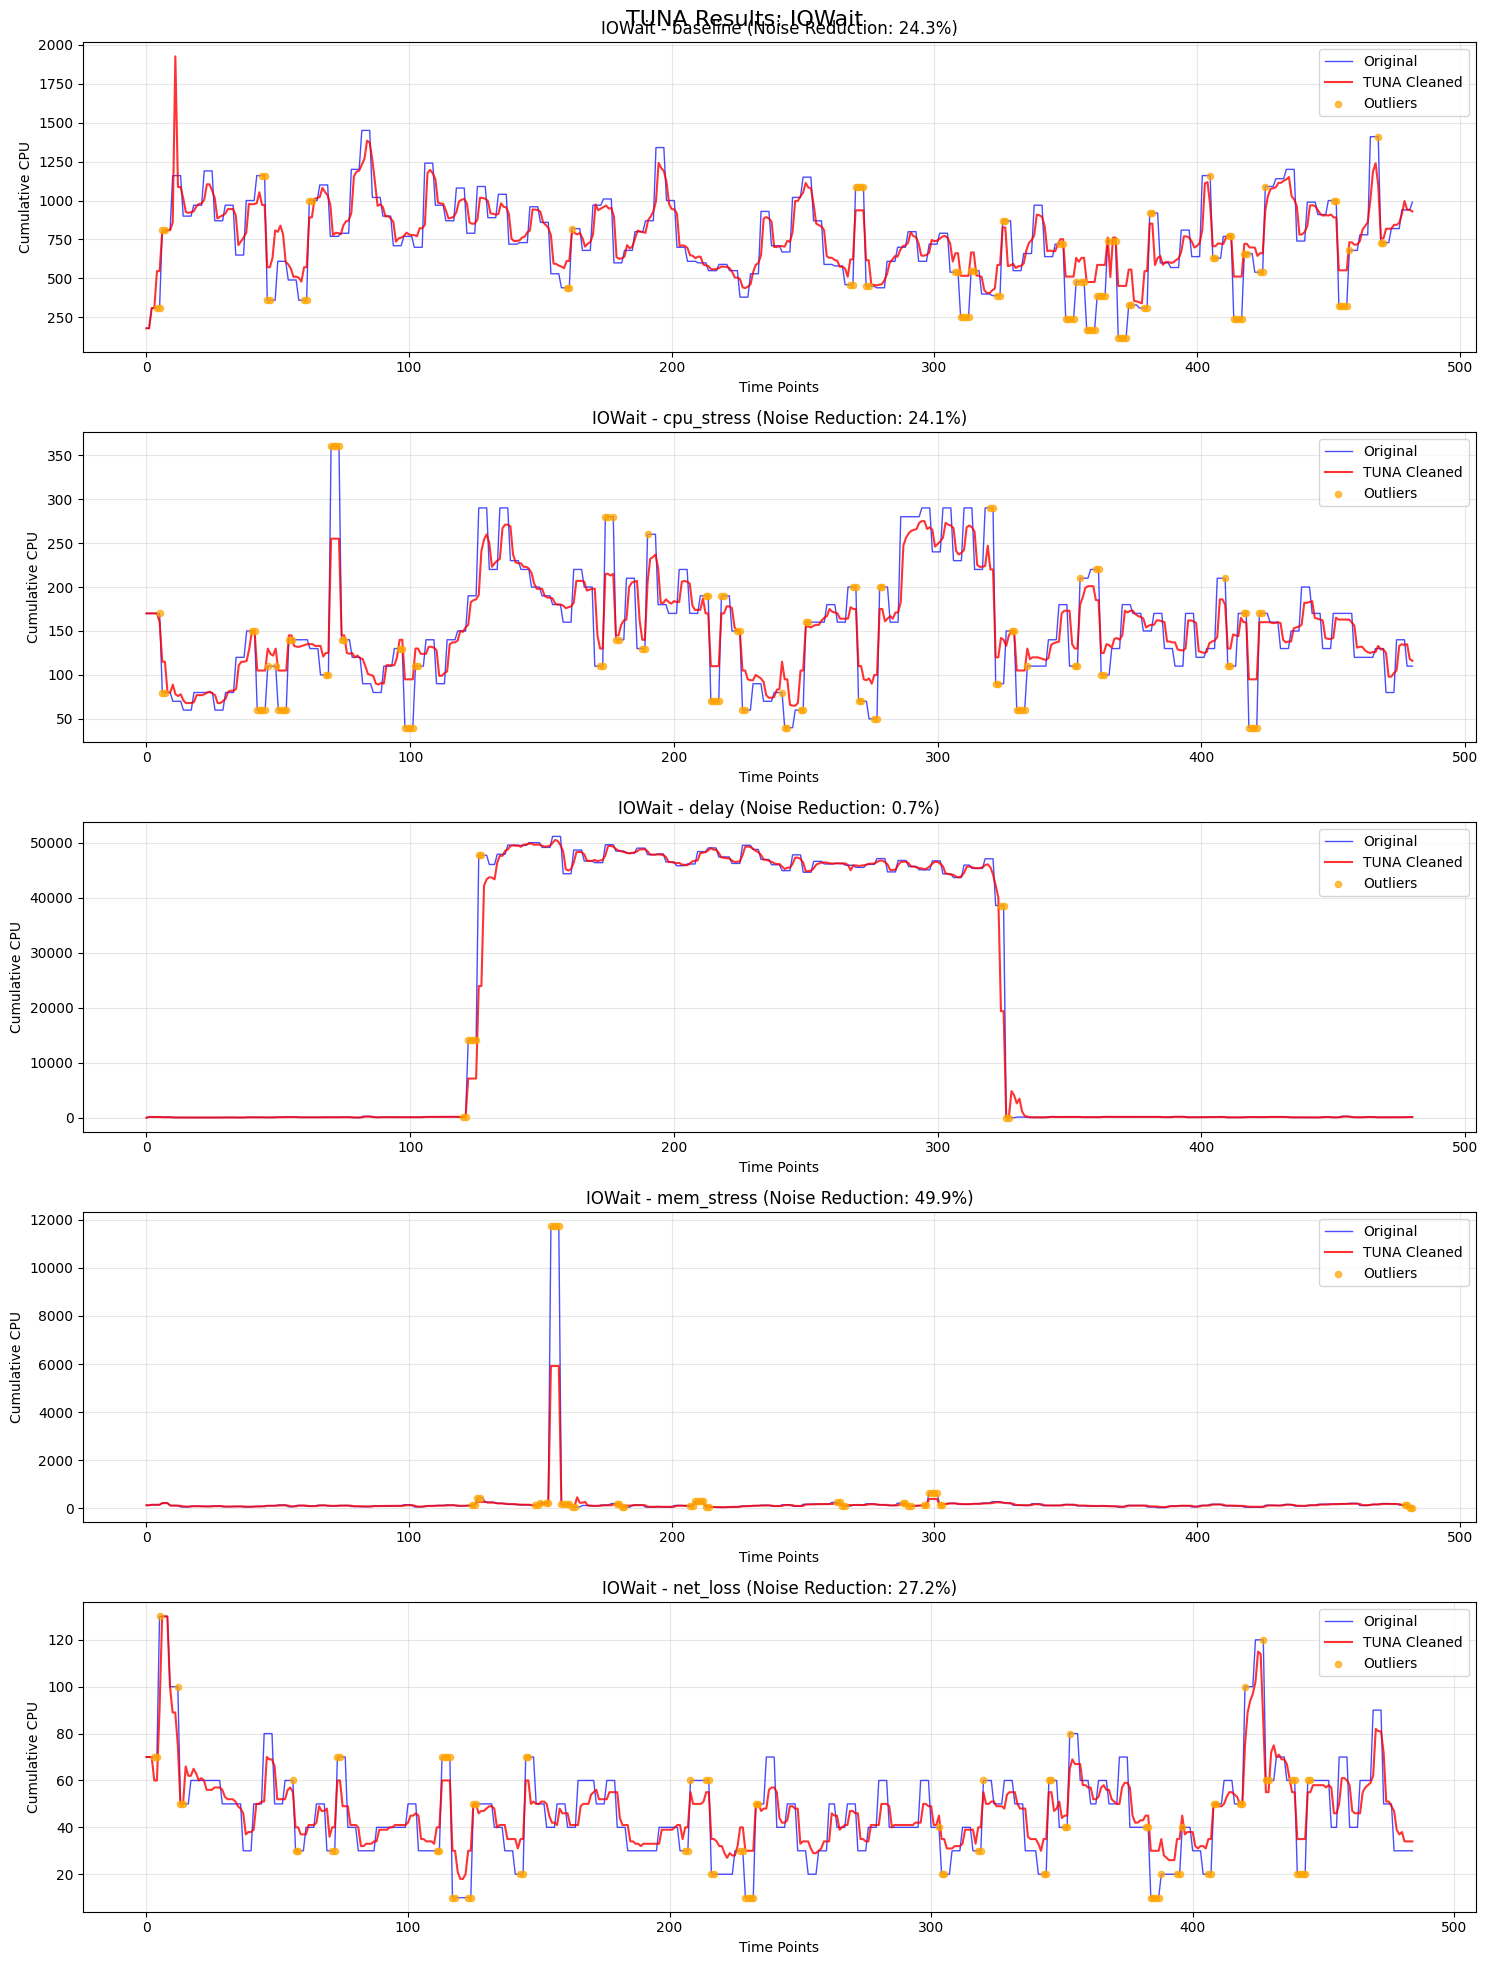

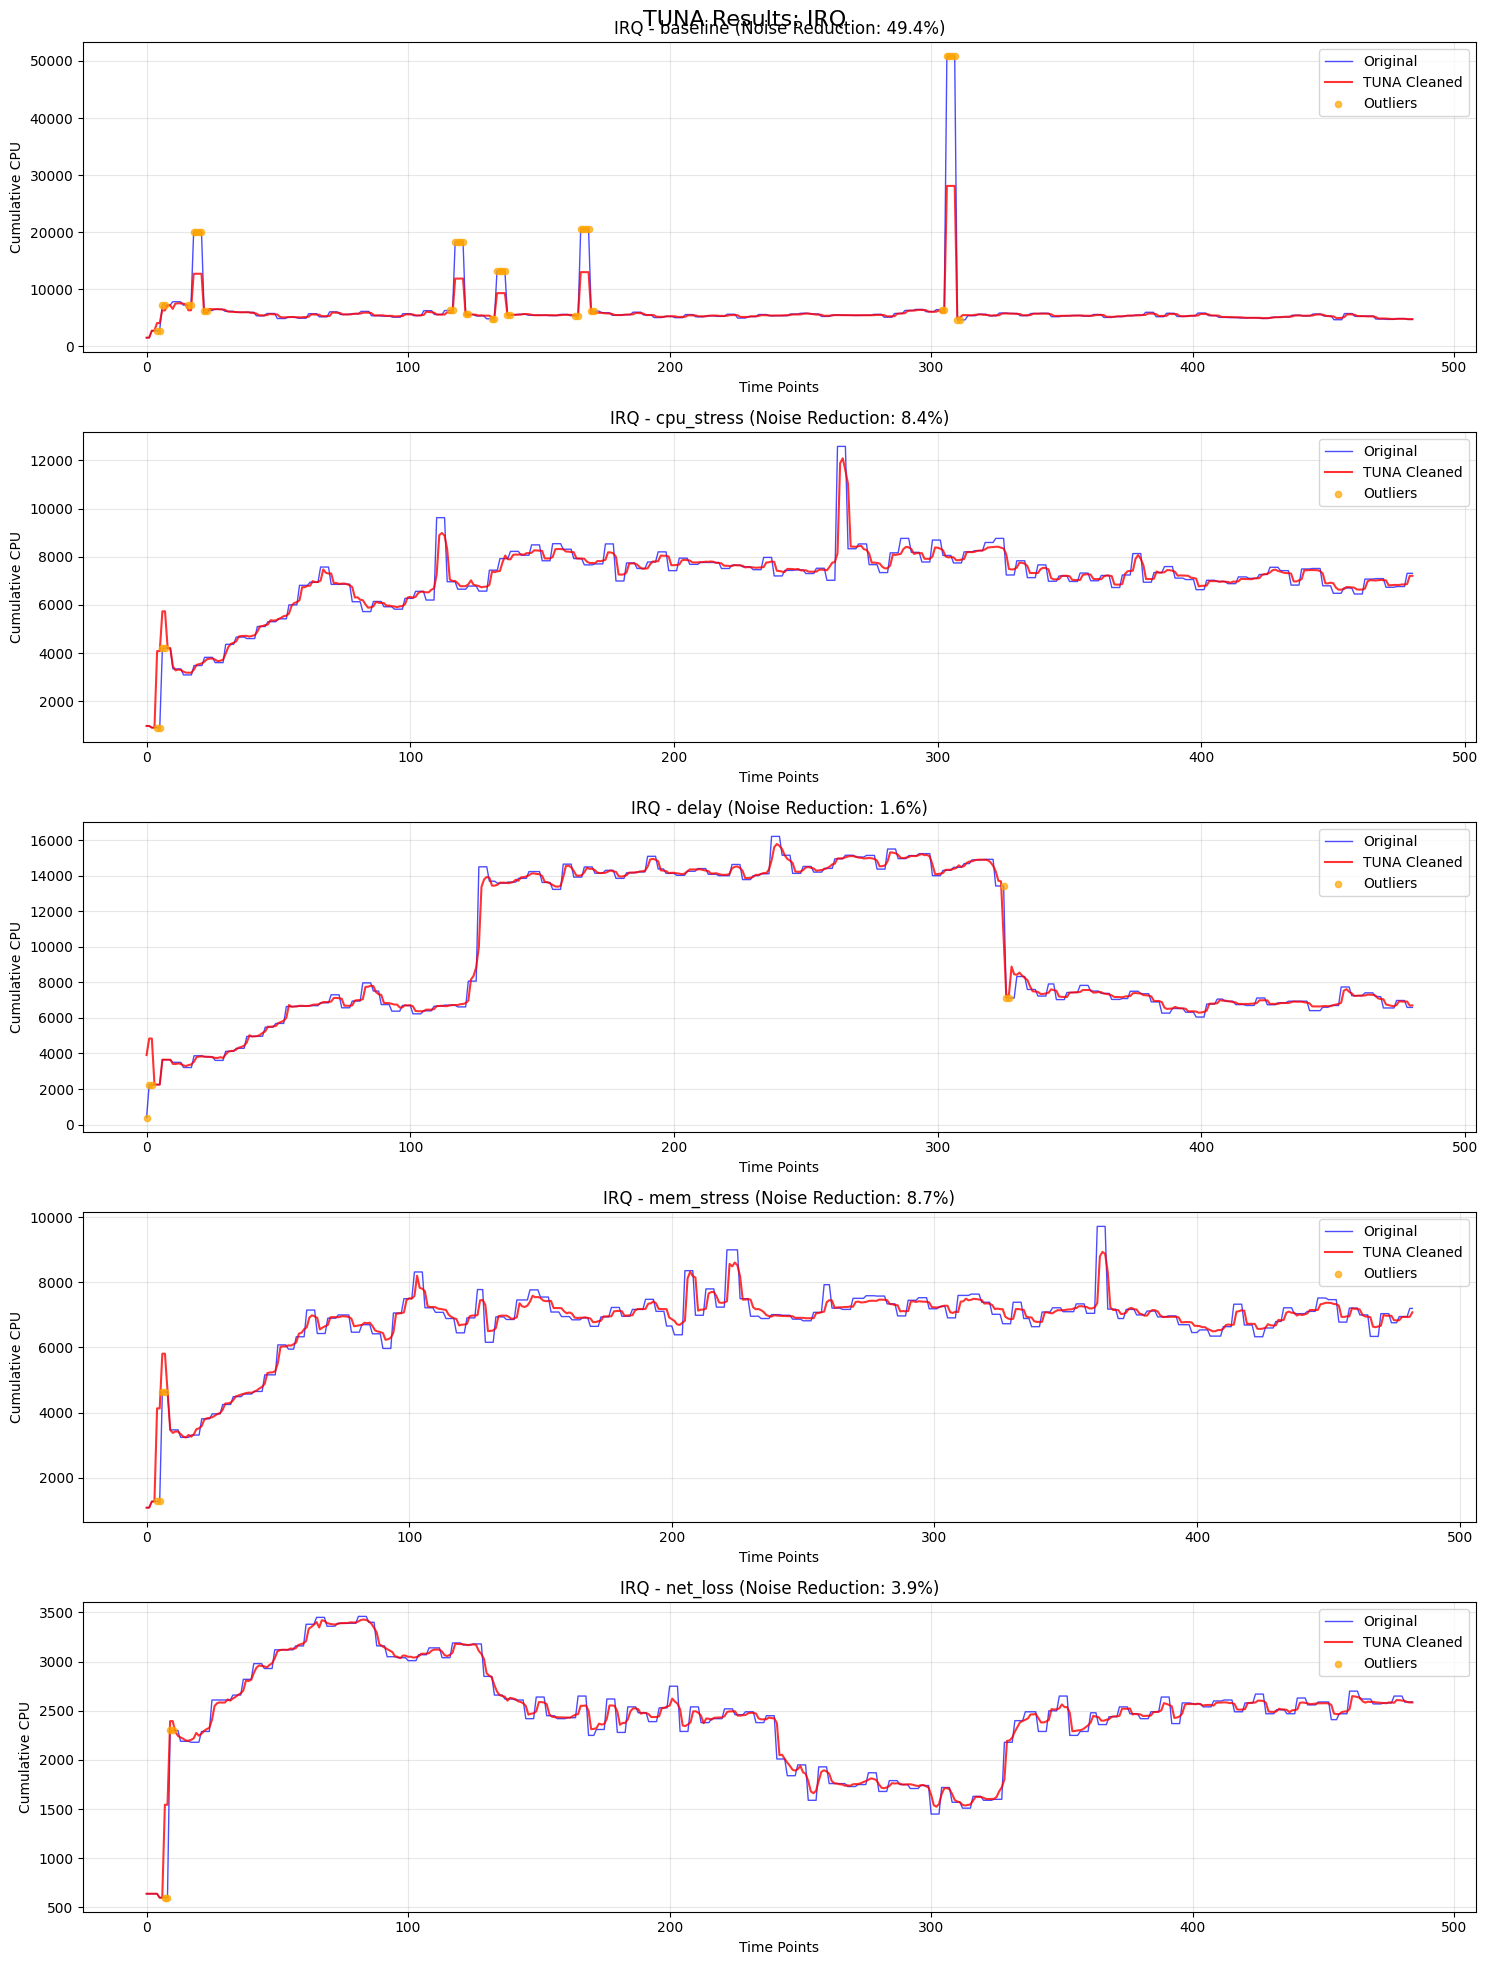

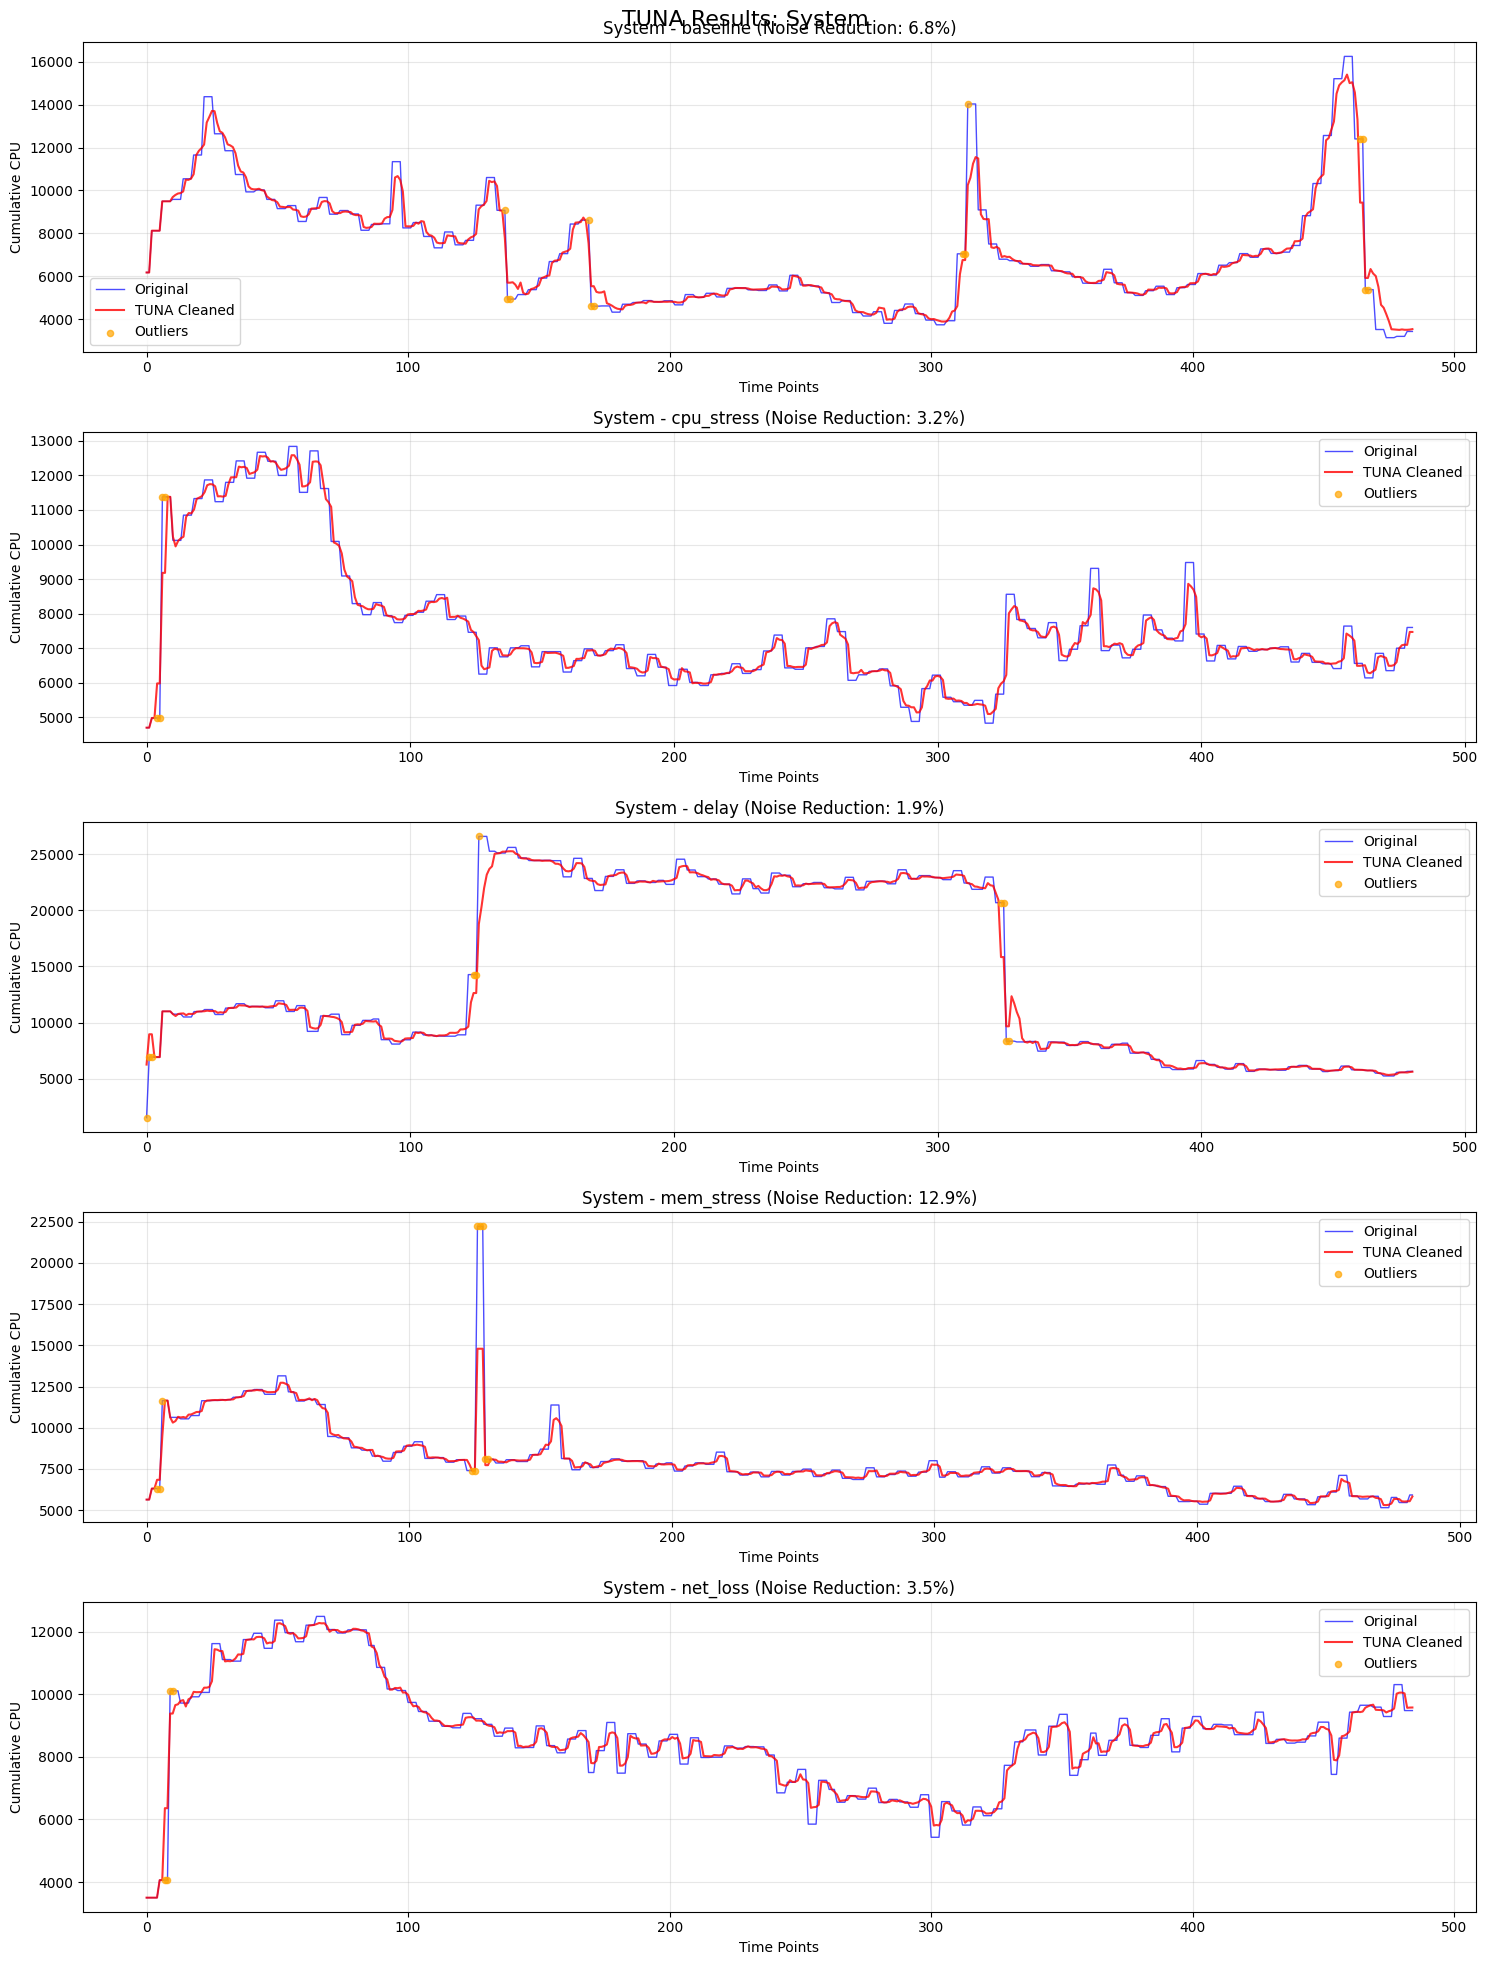

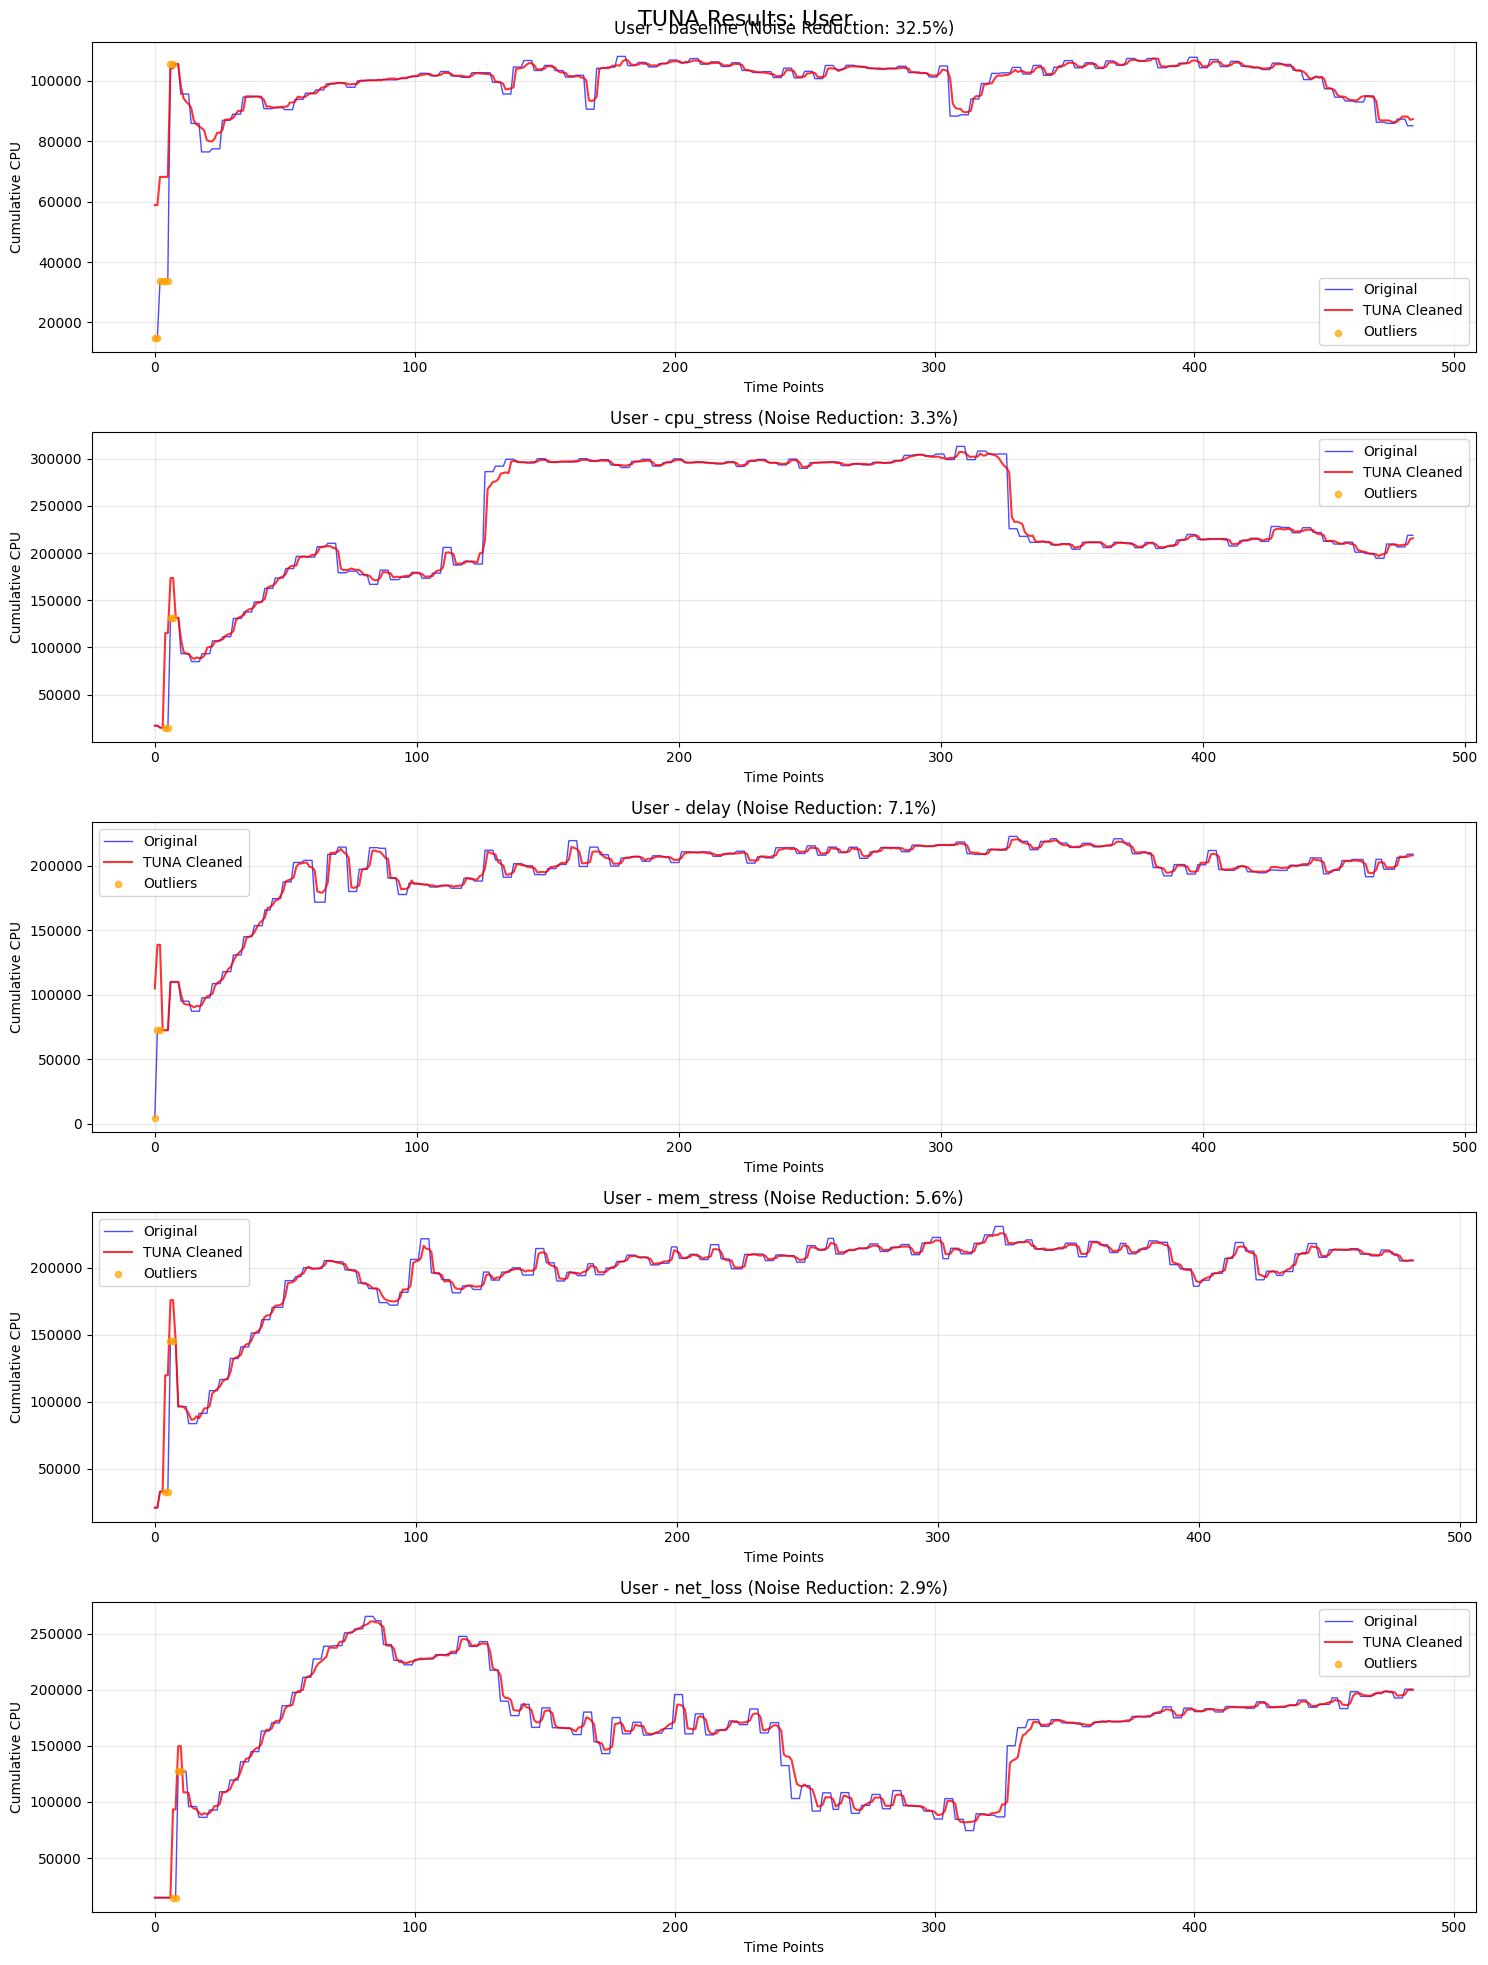

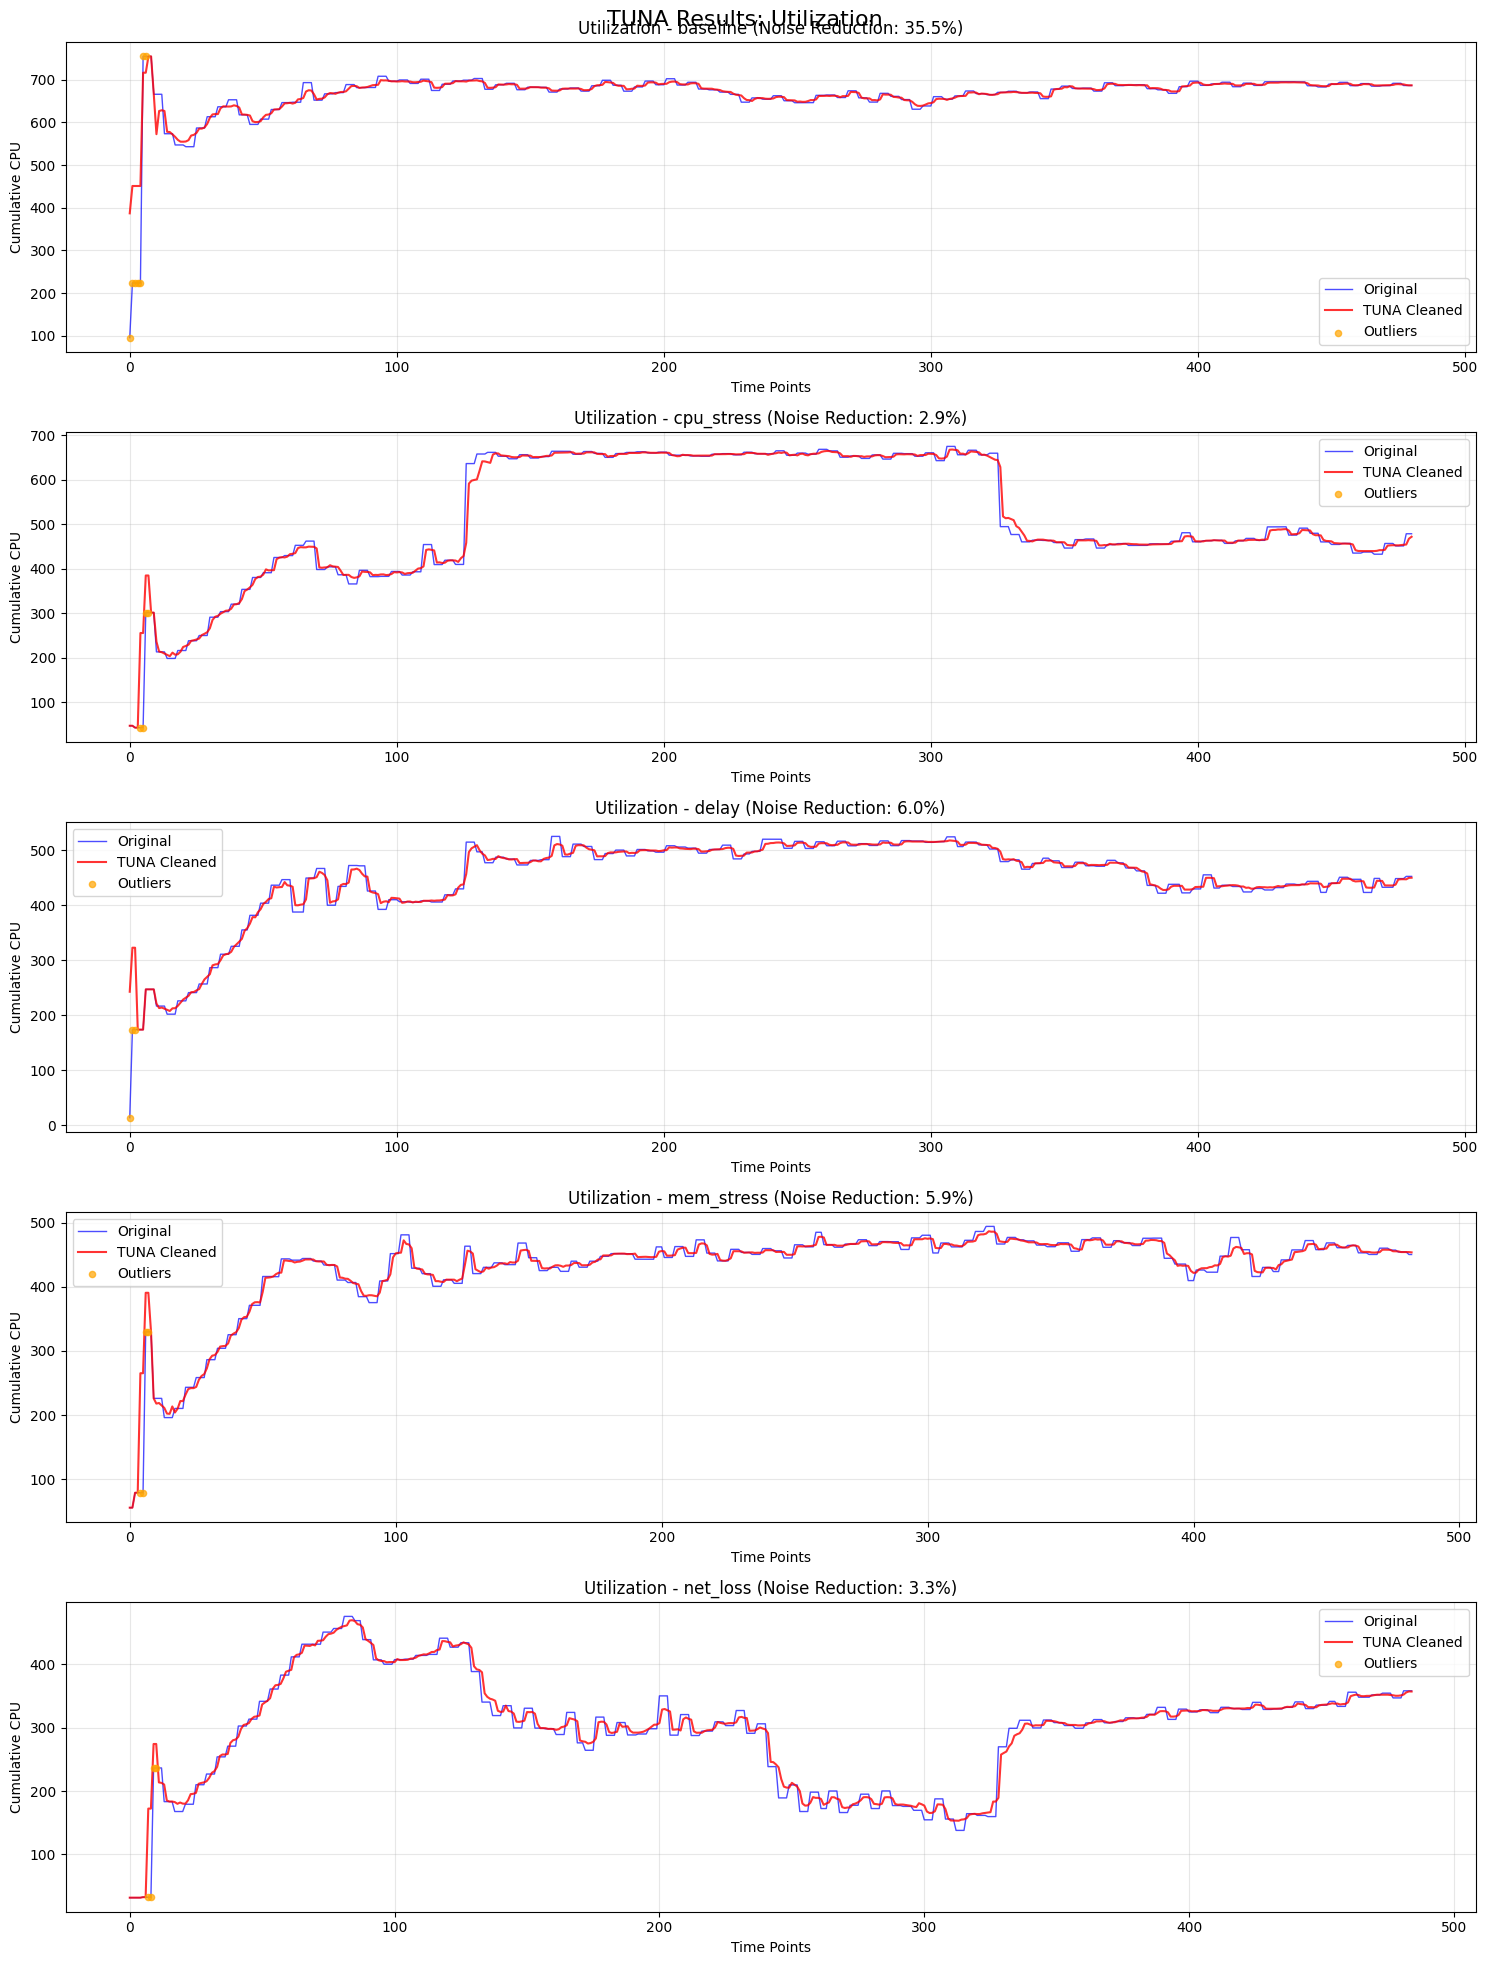


TUNA Results Summary:
Metric       Experiment   Outliers   Noise Red%   Correlation 
------------------------------------------------------------
IOWait       baseline     89               24.3%       0.902
IOWait       cpu_stress   99               24.1%       0.933
IOWait       delay        12                0.7%       0.996
IOWait       mem_stress   51               49.9%       0.999
IOWait       net_loss     85               27.2%       0.917
IRQ          baseline     44               49.4%       0.995
IRQ          cpu_stress   4                 8.4%       0.958
IRQ          delay        6                 1.6%       0.995
IRQ          mem_stress   4                 8.7%       0.960
IRQ          net_loss     4                 3.9%       0.986
System       baseline     13                6.8%       0.977
System       cpu_stress   4                 3.2%       0.985
System       delay        10                1.9%       0.994
System       mem_stress   10               12.9%       0.958

In [2]:
def calculate_cumulative_cpu(df):
    """Calculate total CPU from all CPU columns"""
    exclude_cols = ['Time', 'Minutes', 'source']
    cpu_cols = [col for col in df.columns if col not in exclude_cols]
    return df[cpu_cols].sum(axis=1).values

def detect_outliers_tuna(timeseries, window_size=3, threshold=0.65, min_absolute_range=None):
    """
    TUNA's relative range outlier detection with stability improvements
    Formula: (max - min) / mean > threshold
    Mark only the max/min values in unstable windows as outliers
    """
    outlier_mask = np.zeros(len(timeseries), dtype=bool)
    
    # Calculate adaptive minimum absolute range if not provided
    if min_absolute_range is None:
        # Use 5% of the overall time series standard deviation as minimum range
        min_absolute_range = 0.1 * np.std(timeseries)
    
    # Slide window across time series to detect unstable periods
    for i in range(len(timeseries) - window_size + 1):
        window = timeseries[i:i + window_size]
        window_mean = np.mean(window)
        window_range = np.max(window) - np.min(window)
        
        if window_mean > 0:
            # Apply TUNA relative range criterion
            relative_range = window_range / window_mean
            
            # Additional filter: require minimum absolute range to avoid hypersensitivity
            if relative_range > threshold and window_range > min_absolute_range:
                window_max = np.max(window)
                window_min = np.min(window)
                
                # Mark extreme values within unstable window
                for j in range(window_size):
                    actual_idx = i + j
                    if (timeseries[actual_idx] == window_max or 
                        timeseries[actual_idx] == window_min):
                        outlier_mask[actual_idx] = True
    
    return outlier_mask

def create_features_for_ml(timeseries, experiment_type, window_size=10):
    """Create features for RandomForest training"""
    features = []
    
    # Extract temporal and statistical features from sliding windows
    for i in range(window_size, len(timeseries)):
        window = timeseries[i-window_size:i]
        
        # Statistical features from recent history
        feature_vector = [
            np.mean(window),                    # Rolling average
            np.std(window),                     # Variability measure
            np.median(window),                  # Robust central tendency
            np.max(window) - np.min(window),    # Range indicator
            timeseries[i-1],                    # Previous value dependency
            i / len(timeseries),                # Temporal position
        ]
        
        # Experiment context encoding for cross-experiment learning
        exp_features = [0, 0, 0, 0, 0]
        if experiment_type == "baseline":
            exp_features[0] = 1
        elif experiment_type == "cpu_stress":
            exp_features[1] = 1
        elif experiment_type == "delay":
            exp_features[2] = 1
        elif experiment_type == "mem_stress":
            exp_features[3] = 1
        elif experiment_type == "net_loss":
            exp_features[4] = 1
        
        feature_vector.extend(exp_features)
        features.append(feature_vector)
    
    return np.array(features)

def train_random_forest_for_metric(metric_name, all_experiments):
    """Train RandomForest on stable periods across all experiments"""
    print(f"Training {metric_name}...")
    
    X_stable_all = []
    y_stable_all = []
    
    # Aggregate stable training data from all experimental conditions
    for exp_name, df in all_experiments.items():
        cumulative = calculate_cumulative_cpu(df)
        outlier_mask = detect_outliers_tuna(cumulative)
        stable_mask = ~outlier_mask
        
        features = create_features_for_ml(cumulative, exp_name)
        # Align feature window with stability detection
        stable_features_mask = stable_mask[10:]
        stable_features = features[stable_features_mask]
        stable_targets = cumulative[10:][stable_features_mask]
        
        if len(stable_features) > 0:
            # Apply local smoothing to targets for better generalization
            smoothed_targets = []
            for j, target in enumerate(stable_targets):
                start_idx = max(0, j-2)
                end_idx = min(len(stable_targets), j+3)
                local_values = stable_targets[start_idx:end_idx]
                smoothed_targets.append(np.median(local_values))
            
            X_stable_all.extend(stable_features)
            y_stable_all.extend(smoothed_targets)
    
    # Ensure sufficient training data
    if len(X_stable_all) < 10:
        return None, None
    
    X_stable_all = np.array(X_stable_all)
    y_stable_all = np.array(y_stable_all)
    
    # Standardize features for optimal model performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_stable_all)

    # Hyperparameter grid for model optimization
    param_grid = {
        'n_estimators': [100],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    model = RandomForestRegressor(
        criterion='squared_error',
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )

    # Grid search with cross-validation for robust parameter selection
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_scaled, y_stable_all)
    model = grid_search.best_estimator_
    
    return model, scaler

def apply_penalty(timeseries, outlier_mask, penalty_factor=0.5):
    """Apply penalty to outliers by reducing their deviation from baseline"""
    cleaned_series = timeseries.copy()
    
    # Establish baseline from stable measurements
    stable_values = timeseries[~outlier_mask]
    if len(stable_values) > 0:
        baseline = np.median(stable_values)
    else:
        baseline = np.median(timeseries)
    
    # Reduce outlier magnitude toward baseline
    for i in range(len(timeseries)):
        if outlier_mask[i]:
            original_value = timeseries[i]
            # Linear penalty: reduce distance from baseline by factor
            cleaned_series[i] = baseline + (original_value - baseline) * penalty_factor
    
    return cleaned_series

def apply_tuna_to_single_series(cumulative, exp_name, model, scaler, penalty_factor=0.5, blend_weight=1):
    """Apply TUNA cleaning to a single time series"""
    
    # Phase 1: Identify unstable measurements
    outlier_mask = detect_outliers_tuna(cumulative)
    stable_mask = ~outlier_mask
    outliers_count = np.sum(outlier_mask)
    
    # Phase 2: Apply penalty to unstable measurements
    cleaned_series = apply_penalty(cumulative, outlier_mask, penalty_factor)
    
    # Phase 3: Enhance stable regions with ML predictions
    if model is not None and scaler is not None:
        features = create_features_for_ml(cumulative, exp_name)
        features_scaled = scaler.transform(features)
        ml_predictions = model.predict(features_scaled)
        
        # Blend ML enhancement only for stable periods
        for i, prediction in enumerate(ml_predictions):
            actual_idx = i + 10  # Account for feature window offset
            if actual_idx < len(cleaned_series) and stable_mask[actual_idx]:
                original_value = cumulative[actual_idx]
                cleaned_series[actual_idx] = (
                    blend_weight * prediction + 
                    (1 - blend_weight) * original_value
                )
    
    # Compute improvement metrics
    original_std = np.std(cumulative)
    cleaned_std = np.std(cleaned_series)
    noise_reduction = (original_std - cleaned_std) / original_std * 100
    correlation = np.corrcoef(cumulative, cleaned_series)[0, 1]
    
    return cleaned_series, outlier_mask, {
        'outliers': outliers_count,
        'noise_reduction': noise_reduction,
        'correlation': correlation
    }

def run_tuna_for_all_metrics():
    """Run TUNA for all metrics"""
    print("Running TUNA analysis...")
    
    tuna_results = {}
    
    # Process each performance metric independently
    for metric_name, experiments in all_datasets.items():
        print(f"Processing {metric_name}")
        
        # Train metric-specific model on cross-experiment stable data
        model, scaler = train_random_forest_for_metric(metric_name, experiments)
        
        # Apply cleaning to each experimental condition
        metric_results = {}
        for exp_name, df in experiments.items():
            cumulative = calculate_cumulative_cpu(df)
            cleaned_series, outlier_mask, stats = apply_tuna_to_single_series(
                cumulative, exp_name, model, scaler
            )
            
            metric_results[exp_name] = {
                'original': cumulative,
                'cleaned': cleaned_series,
                'outliers': outlier_mask,
                'stats': stats
            }
        
        tuna_results[metric_name] = metric_results
    
    return tuna_results

def plot_tuna_results(tuna_results):
    """Plot TUNA results with original vs cleaned comparison"""
    
    for metric_name, metric_results in tuna_results.items():
        n_experiments = len(metric_results)
        fig, axes = plt.subplots(n_experiments, 1, figsize=(15, 4*n_experiments))
        
        if n_experiments == 1:
            axes = [axes]
        
        # Visualize cleaning results for each experiment
        for i, (exp_name, results) in enumerate(metric_results.items()):
            original = results['original']
            cleaned = results['cleaned']
            outliers = results['outliers']
            stats = results['stats']
            
            # Plot time series with cleaning overlay
            axes[i].plot(original, 'b-', alpha=0.7, label='Original', linewidth=1)
            axes[i].plot(cleaned, 'r-', alpha=0.8, label='TUNA Cleaned', linewidth=1.5)
            
            # Highlight detected outliers
            outlier_points = np.where(outliers)[0]
            if len(outlier_points) > 0:
                axes[i].scatter(outlier_points, original[outlier_points], 
                               c='orange', s=20, alpha=0.7, label='Outliers', zorder=5)
            
            axes[i].set_title(f'{metric_name} - {exp_name} (Noise Reduction: {stats["noise_reduction"]:.1f}%)')
            axes[i].set_xlabel('Time Points')
            axes[i].set_ylabel('Cumulative CPU')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.suptitle(f'TUNA Results: {metric_name}', fontsize=16)
        plt.tight_layout()
        plt.show()

def print_tuna_summary(tuna_results):
    """Print summary table of cleaning effectiveness"""
    print("\nTUNA Results Summary:")
    print("="*60)
    print(f"{'Metric':<12} {'Experiment':<12} {'Outliers':<10} {'Noise Red%':<12} {'Correlation':<12}")
    print("-"*60)
    
    # Tabulate results across all metrics and experiments
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            stats = results['stats']
            print(f"{metric_name:<12} {exp_name:<12} {stats['outliers']:<10} "
                  f"{stats['noise_reduction']:>10.1f}% {stats['correlation']:>11.3f}")

# Execute complete TUNA analysis pipeline
tuna_results = run_tuna_for_all_metrics()
plot_tuna_results(tuna_results)
print_tuna_summary(tuna_results)